In [1]:
import pandas as pd
import numpy as np

In [2]:
dataset = pd.read_csv("../data/AmazonData.csv")
dataset.head(5)

,Uniq Id,Product Name,Brand Name,Asin,Category,Upc Ean Code,List Price,Selling Price,Quantity,Model Number,...,Product Url,Stock,Product Details,Dimensions,Color,Ingredients,Direction To Use,Is Amazon Seller,Size Quantity Variant,Product Description
0,4c69b61db1fc16e7013b43fc926e502d,"DB Longboards CoreFlex Crossbow 41"" Bamboo Fib...",NaN,NaN,Sports & Outdoors | Outdoor Recreation | Skate...,NaN,NaN,$237.68,NaN,NaN,...,https://www.amazon.com/DB-Longboards-CoreFlex-...,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN
1,66d49bbed043f5be260fa9f7fbff5957,"Electronic Snap Circuits Mini Kits Classpack, ...",NaN,NaN,Toys & Games | Learning & Education | Science ...,NaN,NaN,$99.95,NaN,55324,...,https://www.amazon.com/Electronic-Circuits-Cla...,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN
2,2c55cae269aebf53838484b0d7dd931a,3Doodler Create Flexy 3D Printing Filament Ref...,NaN,NaN,Toys & Games | Arts & Crafts | Craft Kits,NaN,NaN,$34.99,NaN,NaN,...,https://www.amazon.com/3Doodler-Plastic-Innova...,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN
3,18018b6bc416dab347b1b7db79994afa,Guillow Airplane Design Studio with Travel Cas...,NaN,NaN,Toys & Games | Hobbies | Models & Model Kits |...,NaN,NaN,$28.91,NaN,142,...,https://www.amazon.com/Guillow-Airplane-Design...,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN
4,e04b990e95bf73bbe6a3fa09785d7cd0,Woodstock- Collage 500 pc Puzzle,NaN,NaN,Toys & Games | Puzzles | Jigsaw Puzzles,NaN,NaN,$17.49,NaN,62151,...,https://www.amazon.com/Woodstock-Collage-500-p...,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN


In [3]:
dataset.shape

(10002, 28)

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Uniq Id                10002 non-null  object 
 1   Product Name           10002 non-null  object 
 2   Brand Name             0 non-null      float64
 3   Asin                   0 non-null      float64
 4   Category               9172 non-null   object 
 5   Upc Ean Code           34 non-null     object 
 6   List Price             0 non-null      float64
 7   Selling Price          9895 non-null   object 
 8   Quantity               0 non-null      float64
 9   Model Number           8230 non-null   object 
 10  About Product          9729 non-null   object 
 11  Product Specification  8370 non-null   object 
 12  Technical Details      9212 non-null   object 
 13  Shipping Weight        8864 non-null   object 
 14  Product Dimensions     479 non-null    object 
 15  Im

In [5]:
dataset.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
9997     False
9998     False
9999     False
10000    False
10001    False
Length: 10002, dtype: bool

In [6]:
cols = [0,2,3,5,6,8,9,12,14,15,16,17,18,19,20,21,22,23,24,25,26,27]
dataset.drop(dataset.columns[cols], axis =1, inplace=True)

In [7]:
dataset.dropna(inplace = True)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7216 entries, 0 to 10001
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Product Name           7216 non-null   object
 1   Category               7216 non-null   object
 2   Selling Price          7216 non-null   object
 3   About Product          7216 non-null   object
 4   Product Specification  7216 non-null   object
 5   Shipping Weight        7216 non-null   object
dtypes: object(6)
memory usage: 394.6+ KB


In [8]:
new = dataset["Category"].str.split("|", n = 3, expand = True)
  
# making the first category called Main Category
dataset["Main Category"]= new[0] 
  
# making the second category called sub_category 
dataset["Sub-Category"]= new[1]

# making the third category called side_category 
dataset["Side Category"]= new[2]

# making the last column consist of the remaining categories
dataset["Other Categories"]= new[3]

# Dropping old category columns and the remaining categories 
dataset.drop(columns =["Category", "Other Categories"], inplace = True)

In [9]:
dataset.rename(columns = {'Uniq Id':'Id','Shipping Weight':'Shipping Weight(Pounds)', 'Selling Price':'Selling Price($)'}, inplace = True)

In [10]:
indexes_ounces = dataset[dataset['Shipping Weight(Pounds)'].str.contains('ounces', na=False)].index
print(dataset.loc[indexes_ounces, 'Shipping Weight(Pounds)'])

2       12.8 ounces
3       13.4 ounces
4       13.4 ounces
6        9.8 ounces
8       12.2 ounces
           ...     
9988     7.7 ounces
9992    0.16 ounces
9993     5.1 ounces
9994     0.8 ounces
9998    0.96 ounces
Name: Shipping Weight(Pounds), Length: 4082, dtype: object


In [11]:
dataset['Shipping Weight(Pounds)'] = dataset['Shipping Weight(Pounds)'].str.strip('ounces')
dataset['Shipping Weight(Pounds)'] = dataset['Shipping Weight(Pounds)'].str.strip('pounds')
dataset['Selling Price($)'] = dataset['Selling Price($)'].str.replace('$', '')

dataset.head()

,Product Name,Selling Price($),About Product,Product Specification,Shipping Weight(Pounds),Main Category,Sub-Category,Side Category
0,"DB Longboards CoreFlex Crossbow 41"" Bamboo Fib...",237.68,Make sure this fits by entering your model num...,Shipping Weight: 10.7 pounds (View shipping ra...,10.7,Sports & Outdoors,Outdoor Recreation,"Skates, Skateboards & Scooters"
1,"Electronic Snap Circuits Mini Kits Classpack, ...",99.95,Make sure this fits by entering your model num...,Product Dimensions: 14.7 x 11.1 x 10.2...,4,Toys & Games,Learning & Education,Science Kits & Toys
2,3Doodler Create Flexy 3D Printing Filament Ref...,34.99,Make sure this fits by entering your model num...,ProductDimensions:10.3x3.4x0.8inches|ItemWeigh...,12.8,Toys & Games,Arts & Crafts,Craft Kits
3,Guillow Airplane Design Studio with Travel Cas...,28.91,Make 8 different Planes at one time. | Experim...,ProductDimensions:3.5x6.2x13inches|ItemWeight:...,13.4,Toys & Games,Hobbies,Models & Model Kits
4,Woodstock- Collage 500 pc Puzzle,17.49,Make sure this fits by entering your model num...,ProductDimensions:1.9x8x10inches|ItemWeight:13...,13.4,Toys & Games,Puzzles,Jigsaw Puzzles


In [12]:
indexes = dataset[dataset['Selling Price($)'].str.contains(',', na=False)].index
print(indexes)
print(dataset.loc[indexes, 'Selling Price($)'])
dataset['Selling Price($)'] = dataset['Selling Price($)'].str.replace(',', '', regex=False)

Index([ 237,  296,  839,  916, 1292, 1655, 1833, 2091, 2297, 3121, 3122, 4080,
       4451, 6931, 7204, 7325, 7376, 7612, 7947, 8452, 8551, 8638, 8905, 8943,
       9299, 9462, 9580, 9949],
      dtype='int64')
237              1,179.99
296              1,265.00
839              1,899.00
916     895.00 - 2,497.50
1292             1,734.00
1655     32.43 - 9,999.99
1833             1,099.99
2091     42.89 - 9,999.99
2297             2,599.00
3121             1,209.94
3122             1,079.37
4080             1,009.62
4451             2,466.52
6931             2,299.99
7204             1,548.85
7325             1,356.65
7376             1,899.98
7612             1,799.00
7947             2,221.11
8452             1,284.93
8551             1,153.24
8638             3,597.60
8905             1,701.31
8943      6.99 - 9,999.99
9299     19.77 - 9,999.99
9462    748.00 - 2,024.91
9580             4,199.00
9949             1,399.99
Name: Selling Price($), dtype: object


In [13]:
indexes = dataset[dataset['Shipping Weight(Pounds)'].str.contains(',', na=False)].index
print(indexes)
print(dataset.loc[indexes, 'Shipping Weight(Pounds)'])
dataset['Shipping Weight(Pounds)'] = dataset['Shipping Weight(Pounds)'].str.replace(',', '', regex=False)

Index([2297], dtype='int64')
2297    1,070 
Name: Shipping Weight(Pounds), dtype: object


In [14]:
indexes = dataset[dataset['Selling Price($)'] == 'Total price:'].index
print(indexes)
print(dataset.loc[indexes, 'Selling Price($)'])
dataset.drop(indexes, inplace=True)

Index([ 225,  286, 1033, 1819, 3059, 3284, 3893, 3910, 4035, 4042, 4173, 5148,
       5152, 5409, 5508, 5878, 6236, 6350, 6445, 6638, 6639, 6779, 7370, 7523,
       7722, 7728, 8222, 9024],
      dtype='int64')
225     Total price:
286     Total price:
1033    Total price:
1819    Total price:
3059    Total price:
3284    Total price:
3893    Total price:
3910    Total price:
4035    Total price:
4042    Total price:
4173    Total price:
5148    Total price:
5152    Total price:
5409    Total price:
5508    Total price:
5878    Total price:
6236    Total price:
6350    Total price:
6445    Total price:
6638    Total price:
6639    Total price:
6779    Total price:
7370    Total price:
7523    Total price:
7722    Total price:
7728    Total price:
8222    Total price:
9024    Total price:
Name: Selling Price($), dtype: object


In [15]:
indexes = dataset[dataset['Selling Price($)'].str.contains('&', na=False)].index
print(indexes)
print(dataset.loc[indexes, 'Selling Price($)'])
dataset.drop(indexes, inplace=True)

Index([2572], dtype='int64')
2572    & FREE Shipping. Details
Name: Selling Price($), dtype: object


In [16]:
indexes = dataset[dataset['Selling Price($)'].str.contains('Currently', na=False)].index
print(indexes)
print(dataset.loc[indexes, 'Selling Price($)'])
dataset.drop(indexes, inplace=True)

Index([2639, 5335], dtype='int64')
2639    Currently unavailable.
5335    Currently unavailable.
Name: Selling Price($), dtype: object


In [17]:
indexes = dataset[dataset['Selling Price($)'].str.contains('from', na=False)].index
print(indexes)
print(dataset.loc[indexes, 'Selling Price($)'])
dataset.drop(indexes, inplace=True)

Index([2977, 3248, 4557, 5137, 5736, 6140, 6673, 6674], dtype='int64')
2977    from 2 sellers
3248     from 1 seller
4557    from 4 sellers
5137    from 2 sellers
5736    from 4 sellers
6140     from 1 seller
6673    from 7 sellers
6674    from 8 sellers
Name: Selling Price($), dtype: object


In [18]:
indexes = dataset[dataset['Shipping Weight(Pounds)'].str.contains(r'\. ', na=False)].index
print(indexes)
print(dataset.loc[indexes, 'Shipping Weight(Pounds)'])
dataset.drop(indexes, inplace=True)

Index([1619], dtype='int64')
1619    . 
Name: Shipping Weight(Pounds), dtype: object


In [19]:
indexes = dataset[dataset['Selling Price($)'].str.contains('-', na=False)].index
print(indexes)
print(dataset.loc[indexes, 'Selling Price($)'])
dataset.drop(indexes, inplace=True)

Index([ 480,  804,  916, 1655, 1821, 1868, 2091, 2200, 2387, 2912, 3283, 3580,
       4254, 5104, 5389, 5781, 5911, 5949, 6199, 6405, 6542, 6589, 6938, 7136,
       7189, 7233, 7321, 7461, 7670, 7770, 8296, 8943, 9062, 9261, 9299, 9319,
       9431, 9462, 9715, 9883],
      dtype='int64')
480        47.19 - 47.99
804         8.25 - 31.95
916     895.00 - 2497.50
1655     32.43 - 9999.99
1821      94.95 - 159.95
1868       6.99 - 155.38
2091     42.89 - 9999.99
2200       53.00 - 71.75
2387       34.03 - 56.41
2912        9.86 - 11.86
3283        3.65 - 18.42
3580     129.00 - 347.86
4254       12.76 - 21.69
5104       54.99 - 84.99
5389       54.95 - 79.49
5781      65.07 - 159.95
5911       41.99 - 70.00
5949       17.87 - 71.99
6199       58.99 - 65.99
6405       19.54 - 37.91
6542      80.99 - 119.95
6589       19.99 - 25.04
6938        8.25 - 31.95
7136        7.50 - 19.19
7189     118.76 - 159.95
7233       12.00 - 16.00
7321       39.99 - 65.99
7461       49.99 - 64.99
7670      

In [20]:
indexes = dataset[dataset['Selling Price($)'].str.contains(' ', na=False)].index
print(indexes)
print(dataset.loc[indexes, 'Selling Price($)'])
dataset.loc[indexes, 'Selling Price($)'] = dataset.loc[indexes, 'Selling Price($)'].str.split(' ').str[0]

Index([  39,  282, 1029, 1303, 1437, 1556, 1644, 1709, 1908, 2498, 3204, 3322,
       3673, 3742, 3766, 4497, 4968, 4973, 5105, 5119, 5882, 6105, 6233, 6416,
       6836, 6926, 7273, 7309, 7374, 7452, 7460, 7494, 7502, 7582, 7583, 7589,
       7605, 7723, 7776, 7810, 7855, 7893, 7909, 7933, 7986, 8149, 8257, 8341,
       8429, 8487, 8557, 8568, 8571, 8595, 8643, 8671, 8680, 8829, 8910, 8925,
       8999, 9027, 9131, 9182, 9195, 9352, 9664, 9757, 9890, 9952],
      dtype='int64')
39        6.94  6 . 94
282     10.44  10 . 44
1029    13.46  13 . 46
1303    15.63  15 . 63
1437      4.23  4 . 23
             ...      
9352       54.99 54.99
9664    16.45  16 . 45
9757       21.38 21.38
9890      4.38  4 . 38
9952      5.70  5 . 70
Name: Selling Price($), Length: 70, dtype: object


In [21]:
dataset['Selling Price($)'] = dataset['Selling Price($)'].astype(float)
dataset['Shipping Weight(Pounds)'] = dataset['Shipping Weight(Pounds)'].astype(float)

In [22]:
print(indexes_ounces)
indexes_ounces_updated = []

indexes_ounces_updated = dataset.index.intersection(indexes_ounces)
print(indexes_ounces_updated)

dataset.loc[indexes_ounces_updated, 'Shipping Weight(Pounds)'] = dataset.loc[indexes_ounces_updated, 'Shipping Weight(Pounds)'] / 16
print(dataset.loc[indexes_ounces_updated, 'Shipping Weight(Pounds)'])

Index([   2,    3,    4,    6,    8,   10,   13,   14,   18,   19,
       ...
       9978, 9979, 9980, 9983, 9986, 9988, 9992, 9993, 9994, 9998],
      dtype='int64', length=4082)
Index([   2,    3,    4,    6,    8,   10,   13,   14,   18,   19,
       ...
       9978, 9979, 9980, 9983, 9986, 9988, 9992, 9993, 9994, 9998],
      dtype='int64', length=4069)
2       0.80000
3       0.83750
4       0.83750
6       0.61250
8       0.76250
         ...   
9988    0.48125
9992    0.01000
9993    0.31875
9994    0.05000
9998    0.06000
Name: Shipping Weight(Pounds), Length: 4069, dtype: float64


In [23]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7136 entries, 0 to 10001
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product Name             7136 non-null   object 
 1   Selling Price($)         7136 non-null   float64
 2   About Product            7136 non-null   object 
 3   Product Specification    7136 non-null   object 
 4   Shipping Weight(Pounds)  7136 non-null   float64
 5   Main Category            7136 non-null   object 
 6   Sub-Category             7136 non-null   object 
 7   Side Category            6155 non-null   object 
dtypes: float64(2), object(6)
memory usage: 759.8+ KB


In [25]:
dataset.to_csv('../data/CleanData.csv', index=False)

In [24]:
# Start of EDA
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
# finding out the unique main categories
dataset["Main Category"].unique()

array(['Sports & Outdoors ', 'Toys & Games ',
       'Clothing, Shoes & Jewelry ', 'Home & Kitchen ', 'Pet Supplies ',
       'Arts, Crafts & Sewing ', 'Electronics ', 'Patio, Lawn & Garden ',
       'Tools & Home Improvement ', 'Office Products ', 'Baby Products ',
       'Grocery & Gourmet Food ', 'Video Games ',
       'Remote & App Controlled Vehicle Parts ', 'Health & Household ',
       'Industrial & Scientific ', 'Beauty & Personal Care ',
       'Automotive ', 'Remote & App Controlled Vehicles & Parts ',
       'Musical Instruments ', 'Hobbies ', 'Movies & TV ',
       'Cell Phones & Accessories '], dtype=object)

Text(0, 0.5, 'Count of products')

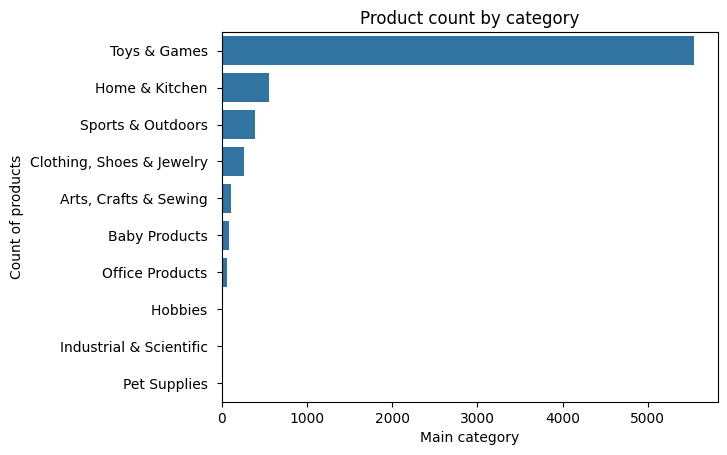

In [26]:
#data visualisation

#lets look at patterns in terms of Product Category popularity
#generate count for "Main Category"

#Top 10 barplot of categories
order = dataset['Main Category'].value_counts()[:10].index
sns.countplot(y='Main Category', data=dataset, order=order)
plt.title("Product count by category")
plt.xlabel("Main category")
plt.ylabel("Count of products")

Text(0.5, 1.0, 'Distribution of the Prices in Toys & Games Category')

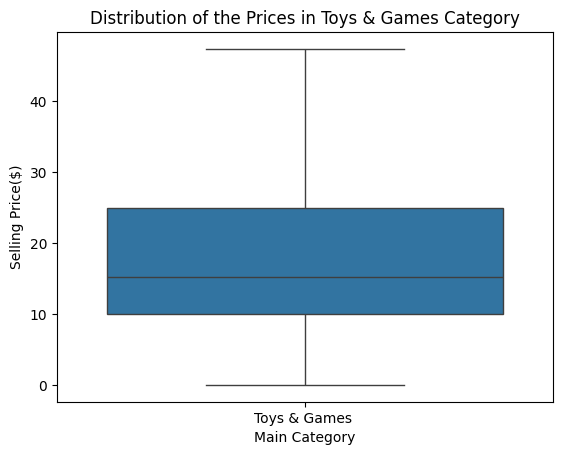

In [27]:
#generate boxplot to understand the distribution  
toys = dataset[dataset["Main Category"] == 'Toys & Games ']
sns.boxplot(data = toys, x='Main Category', y='Selling Price($)', showfliers=False)
plt.title("Distribution of the Prices in Toys & Games Category")

Text(0.5, 1.0, 'Relationship between Price & Shipping Weight in Toys & Games category')

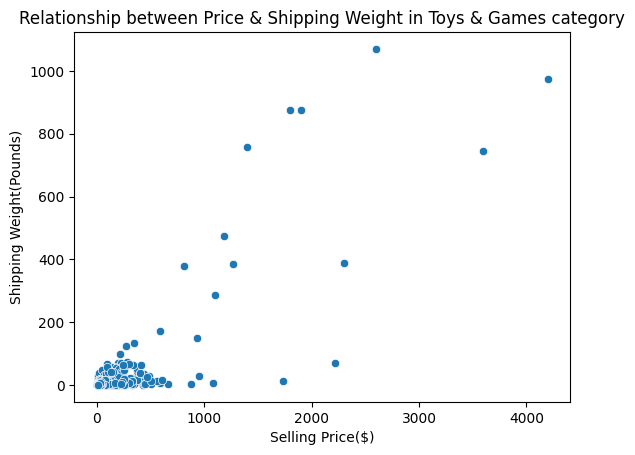

In [28]:
#generate scatterplot to understand the relationship 
sns.scatterplot(data=toys, x="Selling Price($)", y="Shipping Weight(Pounds)")
plt.title("Relationship between Price & Shipping Weight in Toys & Games category")

Text(0.5, 1.0, 'Distribution of the Prices in Home & Kitchen Category')

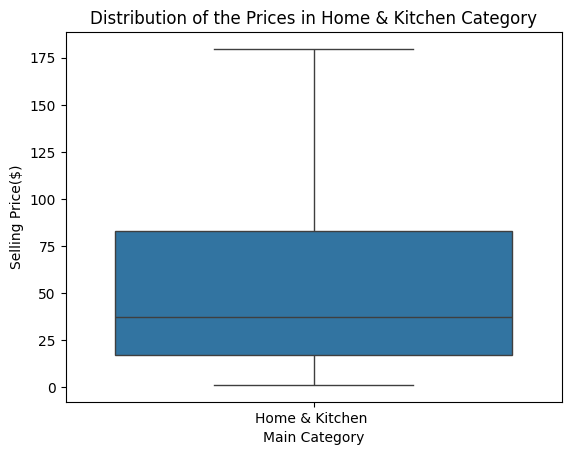

In [29]:
#generate boxplot to understand the distribution  
home = dataset[dataset["Main Category"] == 'Home & Kitchen ']
sns.boxplot(data = home, x='Main Category', y='Selling Price($)', showfliers=False)
plt.title("Distribution of the Prices in Home & Kitchen Category")

Text(0.5, 1.0, 'Relationship between Price & Shipping Weight in Home & Kitchen Category')

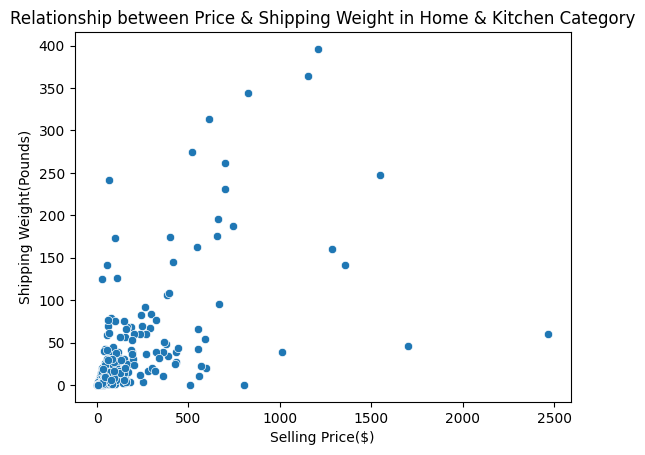

In [30]:
#generate scatterplot to understand the relationship
sns.scatterplot(data=home, x="Selling Price($)", y="Shipping Weight(Pounds)")
plt.title("Relationship between Price & Shipping Weight in Home & Kitchen Category")

Text(0.5, 1.0, 'Distribution of the Prices in Sports & Outdoors Category')

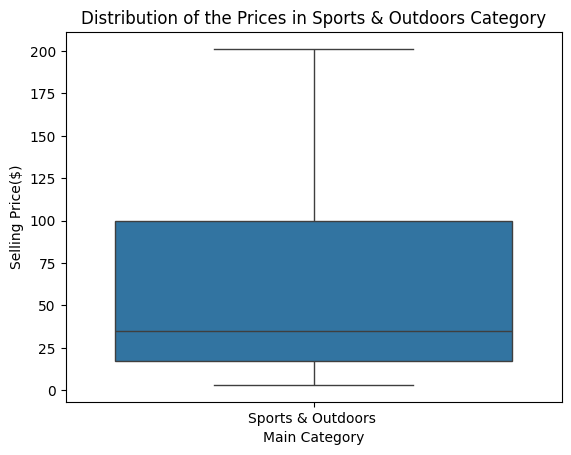

In [31]:
#generate boxplot to understand the distribution  
sports = dataset[dataset["Main Category"] == 'Sports & Outdoors ']
sns.boxplot(data = sports, x='Main Category', y='Selling Price($)', showfliers=False)
plt.title("Distribution of the Prices in Sports & Outdoors Category")

Text(0.5, 1.0, 'Relationship between Price & Shipping Weight in Sports & Outdoors Category')

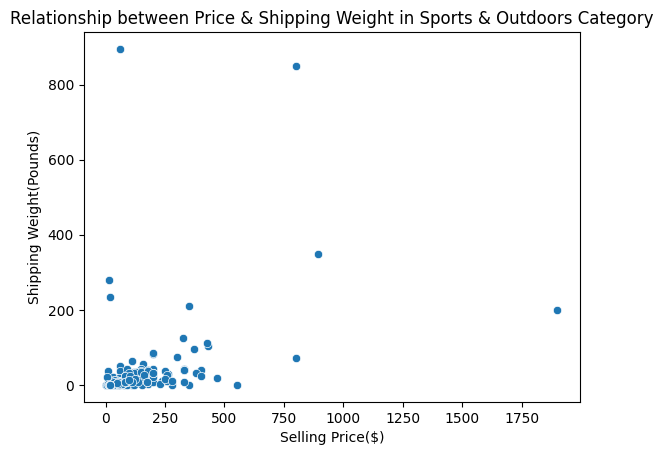

In [32]:
#generate scatterplot to understand the relationship
sns.scatterplot(data=sports, x="Selling Price($)", y="Shipping Weight(Pounds)")
plt.title("Relationship between Price & Shipping Weight in Sports & Outdoors Category")

Text(0.5, 1.0, 'Distribution of the Prices in Clothing, Shoes & Jewelry Category')

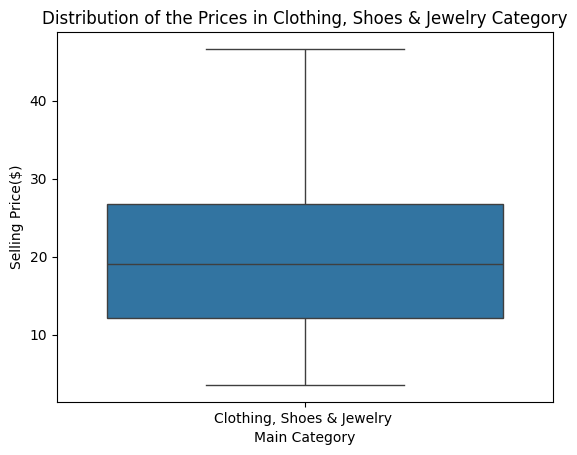

In [33]:
#generate boxplot to understand the distribution  
csj = dataset[dataset["Main Category"] == 'Clothing, Shoes & Jewelry ']
sns.boxplot(data = csj, x='Main Category', y='Selling Price($)', showfliers=False)
plt.title("Distribution of the Prices in Clothing, Shoes & Jewelry Category")

Text(0.5, 1.0, 'Relationship between Price & Shipping Weight in Clothing, Shoes & Jewelry Category')

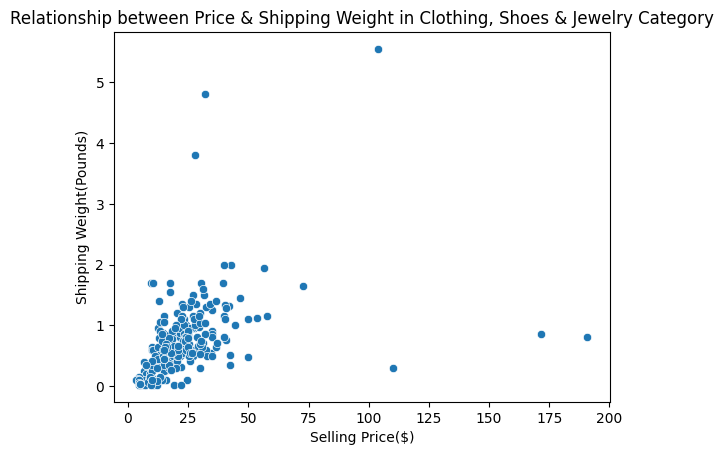

In [34]:
#generate scatterplot to understand the relationship
sns.scatterplot(data=csj, x="Selling Price($)", y="Shipping Weight(Pounds)")
plt.title("Relationship between Price & Shipping Weight in Clothing, Shoes & Jewelry Category")

Text(0.5, 1.0, 'Distribution of the Prices in Arts, Crafts & Sewing Category')

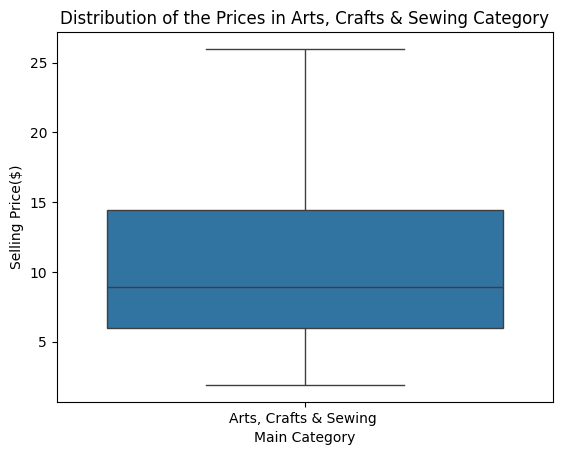

In [35]:
#generate boxplot to understand the distribution  
artscraft = dataset[dataset["Main Category"] == 'Arts, Crafts & Sewing ']
sns.boxplot(data = artscraft, x='Main Category', y='Selling Price($)', showfliers=False)
plt.title("Distribution of the Prices in Arts, Crafts & Sewing Category")

Text(0.5, 1.0, 'Relationship between Price & Shipping Weight in Arts, Crafts & Sewing Category')

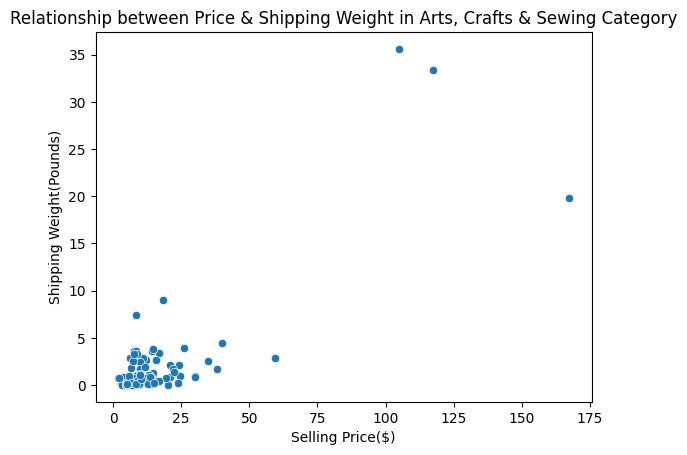

In [36]:
#generate scatterplot to understand the relationship
sns.scatterplot(data=artscraft, x="Selling Price($)", y="Shipping Weight(Pounds)")
plt.title("Relationship between Price & Shipping Weight in Arts, Crafts & Sewing Category")